# Sobel filter

In [1]:
import cv2
import numpy as np
from skimage import filters

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
image = cv2.imread('imgO.jpg')

In [8]:
image_arr = np.asarray(image)

In [27]:
print(type(image))

<class 'numpy.ndarray'>


In [9]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
edge_sobel = filters.sobel(image)
imgArr = filters.sobel(image_arr)
imgGray = filters.sobel(image_gray)

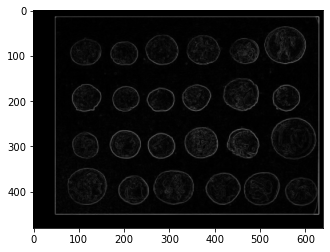

In [11]:
plt.imshow(edge_sobel)

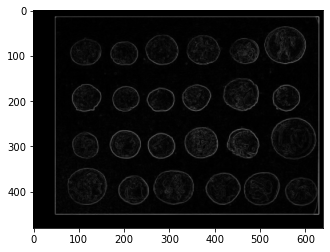

In [12]:
plt.imshow(imgArr)

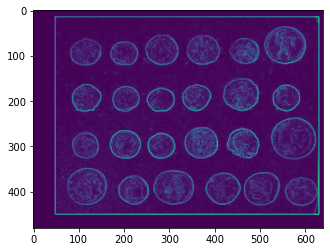

In [13]:
plt.imshow(imgGray)

# Watershed

In [5]:
import cv2
import numpy as np
from skimage import filters, color

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
image = cv2.imread('imgO.jpg')

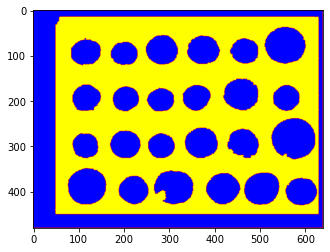

In [7]:
new_image = np.copy(image)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(image,markers)
new_image[markers == -1] = [255,0,0]
img2 = color.label2rgb(markers, bg_label=0)

plt.imshow(img2)